In [40]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import matplotlib.ticker as ticker
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression

# need to switch to csv
# Load the CSV file
file_path = 'Resources/new_data.csv'
csv_df = pd.read_csv(file_path, header=0)

# Display sheet names to identify relevant data
print(csv_df)

                                Track                        Album Name  \
0                 MILLION DOLLAR BABY      Million Dollar Baby - Single   
1                         Not Like Us                       Not Like Us   
2          i like the way you kiss me        I like the way you kiss me   
3                             Flowers                  Flowers - Single   
4                             Houdini                           Houdini   
...                               ...                               ...   
4595                For the Last Time                 For the Last Time   
4596                 Dil Meri Na Sune  Dil Meri Na Sune (From "Genius")   
4597            Grace (feat. 42 Dugg)                           My Turn   
4598              Nashe Si Chadh Gayi             November Top 10 Songs   
4599  Me Acostumbre (feat. Bad Bunny)   Me Acostumbre (feat. Bad Bunny)   

              Artist Release Date All Time Rank Spotify Streams  \
0      Tommy Richman    4/26/202

In [41]:
# Select relevant columns

columns_to_select=['Track', 'Album Name', 'Artist', 'Release Date', 'All Time Rank','Spotify Popularity', 'TikTok Likes', 'Explicit Track']

spotify_likes_data = csv_df[columns_to_select]

spotify_likes_data.head()

,Track,Album Name,Artist,Release Date,All Time Rank,Spotify Popularity,TikTok Likes,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,1,92.0,"651,565,900",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,2,92.0,"35,223,547",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,3,92.0,"275,154,237",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,4,85.0,"1,078,757,968",0
4,Houdini,Houdini,Eminem,5/31/2024,5,88.0,NaN,1


In [42]:
# Show count of each column
spotify_likes_data.count()

Track                 4600
Album Name            4600
Artist                4595
Release Date          4600
All Time Rank         4600
Spotify Popularity    3796
TikTok Likes          3620
Explicit Track        4600
dtype: int64

In [43]:
# Drop blank rows
spotify_likes_data_clean = spotify_likes_data.dropna()
spotify_likes_data_clean.count()

Track                 3309
Album Name            3309
Artist                3309
Release Date          3309
All Time Rank         3309
Spotify Popularity    3309
TikTok Likes          3309
Explicit Track        3309
dtype: int64

In [44]:
# Show new data
print(spotify_likes_data_clean.dtypes)

Track                  object
Album Name             object
Artist                 object
Release Date           object
All Time Rank          object
Spotify Popularity    float64
TikTok Likes           object
Explicit Track          int64
dtype: object


In [45]:
# Conversion to start
print("Before conversion:")
print(spotify_likes_data_clean[['TikTok Likes', 'All Time Rank', 'Spotify Popularity']].count())

Before conversion:
TikTok Likes          3309
All Time Rank         3309
Spotify Popularity    3309
dtype: int64


In [46]:
# Function to convert to numeric
def convert_to_numeric(value):
    if pd.isna(value):
        return np.nan
    try:
        # Remove commas and convert to float
        return float(str(value).replace(',', ''))
    except ValueError:
        return np.nan

# Apply the conversion to both columns
spotify_likes_data_clean['TikTok Likes'] = spotify_likes_data_clean['TikTok Likes'].apply(convert_to_numeric)
spotify_likes_data_clean['All Time Rank'] = spotify_likes_data_clean['All Time Rank'].apply(convert_to_numeric)

# Check the results
print("After conversion:")
print(spotify_likes_data_clean[['TikTok Likes', 'All Time Rank', 'Spotify Popularity']].dtypes)
print(spotify_likes_data_clean[['TikTok Likes', 'All Time Rank', 'Spotify Popularity']].count())

# Check for any remaining non-numeric values
print("\nNon-numeric values in TikTok Likes:")
print(spotify_likes_data_clean[pd.isna(spotify_likes_data_clean['TikTok Likes'])]['TikTok Likes'].head())

print("\nNon-numeric values in All Time Rank:")
print(spotify_likes_data_clean[pd.isna(spotify_likes_data_clean['All Time Rank'])]['All Time Rank'].head())

# Display sample of original values
print("\nSample of original TikTok Likes values:")
print(spotify_likes_data_clean['TikTok Likes'].head())

print("\nSample of original All Time Rank values:")
print(spotify_likes_data_clean['All Time Rank'].head())

After conversion:
TikTok Likes          float64
All Time Rank         float64
Spotify Popularity    float64
dtype: object
TikTok Likes          3309
All Time Rank         3309
Spotify Popularity    3309
dtype: int64

Non-numeric values in TikTok Likes:
Series([], Name: TikTok Likes, dtype: float64)

Non-numeric values in All Time Rank:
Series([], Name: All Time Rank, dtype: float64)

Sample of original TikTok Likes values:
0    6.515659e+08
1    3.522355e+07
2    2.751542e+08
3    1.078758e+09
5    2.149435e+08
Name: TikTok Likes, dtype: float64

Sample of original All Time Rank values:
0    1.0
1    2.0
2    3.0
3    4.0
5    6.0
Name: All Time Rank, dtype: float64


C:\Users\rdina\AppData\Local\Temp\ipykernel_40164\2345013518.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_likes_data_clean['TikTok Likes'] = spotify_likes_data_clean['TikTok Likes'].apply(convert_to_numeric)
C:\Users\rdina\AppData\Local\Temp\ipykernel_40164\2345013518.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_likes_data_clean['All Time Rank'] = spotify_likes_data_clean['All Time Rank'].apply(convert_to_numeric)


In [47]:
# Sort by TikTok Likes
tik_tok_sort = spotify_likes_data_clean.sort_values(by='TikTok Likes', ascending=True)

tik_tok_sort.to_csv('check.csv',index=False)

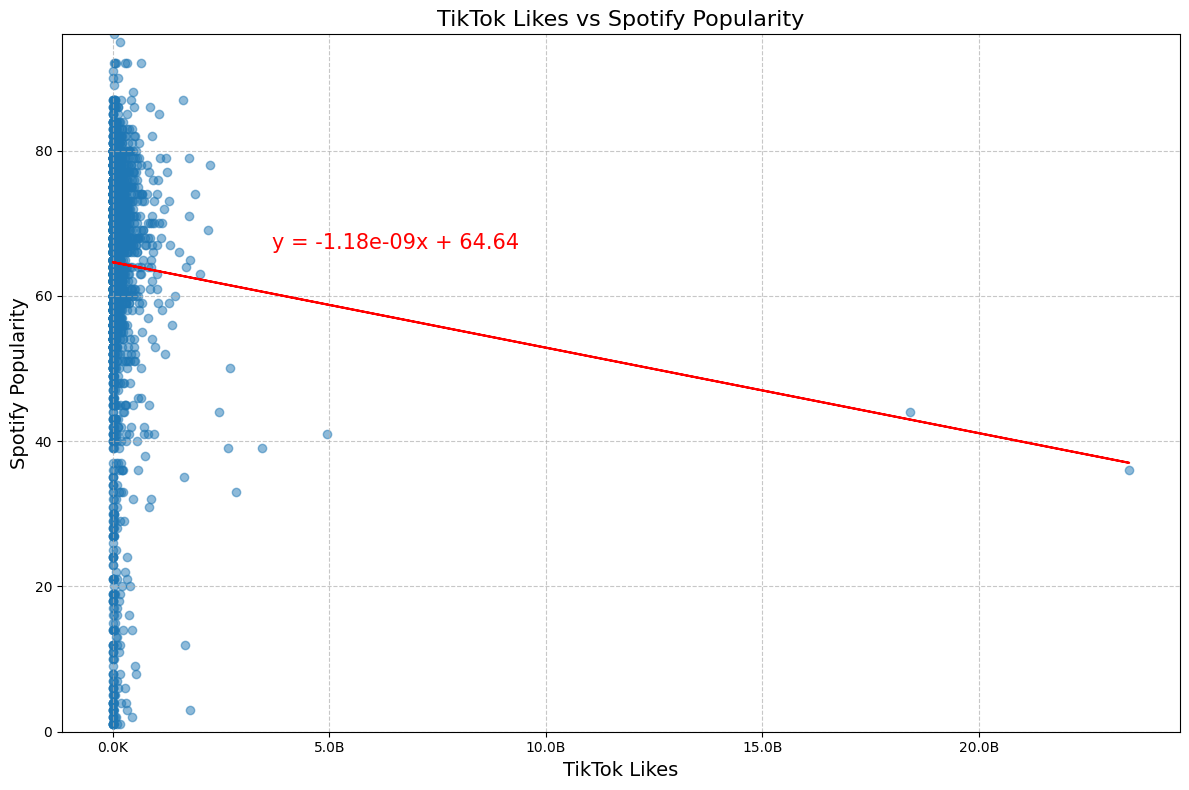

Correlation between TikTok Likes and Spotify Popularity: -0.0470
R-squared: 0.0022


In [48]:
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(spotify_likes_data_clean['TikTok Likes'], 
            spotify_likes_data_clean['Spotify Popularity'], 
            alpha=0.5)  # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(spotify_likes_data_clean['TikTok Likes'], 
                                                            spotify_likes_data_clean['Spotify Popularity'])
line = slope * spotify_likes_data_clean['TikTok Likes'] + intercept

# Plot the line of best fit
plt.plot(spotify_likes_data_clean['TikTok Likes'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = spotify_likes_data_clean['TikTok Likes'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('TikTok Likes', fontsize=14)
plt.ylabel('Spotify Popularity', fontsize=14)
plt.title('TikTok Likes vs Spotify Popularity', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits
max_popularity = spotify_likes_data_clean['Spotify Popularity'].max()
plt.ylim(0, max_popularity)  # This sets the y-axis range

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = spotify_likes_data_clean['TikTok Likes'].corr(spotify_likes_data_clean['Spotify Popularity'])
print(f"Correlation between TikTok Likes and Spotify Popularity: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

#### The correlation coefficient of -0.0470 between TikTok Likes and Spotify Popularity indicates there is a weak correlation between these two factors. With the value being so close to 0 and in the negative, there is a slight tedency for Spotify Popularity to decrease as TikTok likes increase and vice versa. Still, it is not a significant enough correlation for it to matter when anticipating artist popularity. The near zero correlation also suggests these are two completely independent variables. 

#### From this data analysis, we can conclude that an artit that is not popular on TikTok based on likes may be very popular on Spotify. This may also suggest that engagement cultures and functions with each platform result in in TikTok and Spotify are completely opposite results from each other. Ultimately, there may be different strategies required for success on each platform.

### Further research into other factors and artist characteristics impacting popularity (i.e. - social media engagement, age, sex, gender, genre) could yield stronger correlational data or even causational explanations for an artist's popularity. 

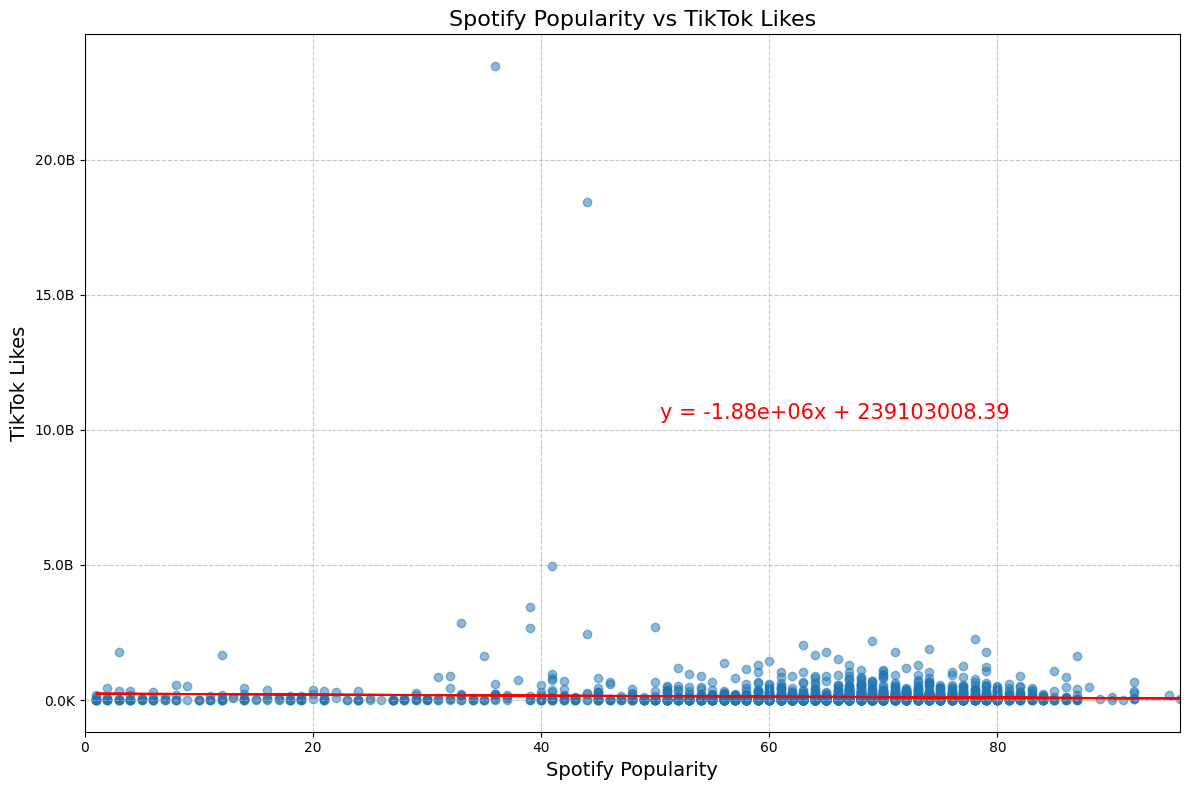

Correlation between Spotify Popularity and TikTok Likes: -0.0470
R-squared: 0.0022


In [49]:
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(spotify_likes_data_clean['Spotify Popularity'], 
            spotify_likes_data_clean['TikTok Likes'], 
            alpha=0.5)  # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(spotify_likes_data_clean['Spotify Popularity'], 
                                                            spotify_likes_data_clean['TikTok Likes'])
line = slope * spotify_likes_data_clean['Spotify Popularity'] + intercept

# Plot the line of best fit
plt.plot(spotify_likes_data_clean['Spotify Popularity'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = spotify_likes_data_clean['Spotify Popularity'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(10, 200), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('Spotify Popularity', fontsize=14)
plt.ylabel('TikTok Likes', fontsize=14)
plt.title('Spotify Popularity vs TikTok Likes', fontsize=16)

# Format y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set x-axis limits
max_popularity = spotify_likes_data_clean['Spotify Popularity'].max()
plt.xlim(0, max_popularity)  # This sets the x-axis range

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = spotify_likes_data_clean['Spotify Popularity'].corr(spotify_likes_data_clean['TikTok Likes'])
print(f"Correlation between Spotify Popularity and TikTok Likes: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

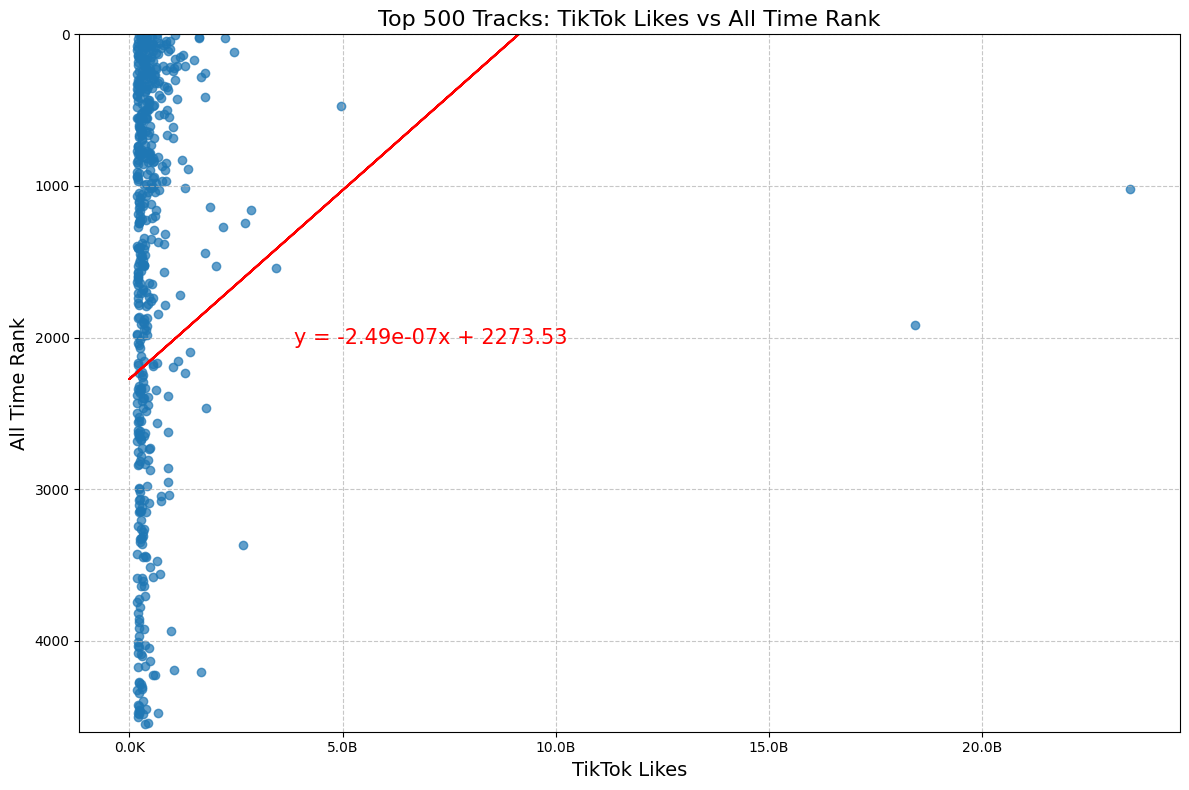

Correlation between TikTok Likes and All Time Rank for top 500: -0.0553
R-squared: 0.0114

Statistics for Top 500 tracks:
Average TikTok Likes: 563,284,838
Average All Time Rank: 1518.75
Highest TikTok Likes: 23,474,223,833
Best (Lowest) All Time Rank: 1


In [50]:
# Sort the dataframe by TikTok Likes in descending order and take the top 500
top_500 = spotify_likes_data_clean.sort_values('TikTok Likes', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500['TikTok Likes'], 
            top_500['All Time Rank'], 
            alpha=0.7)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(spotify_likes_data_clean['TikTok Likes'], 
                                                            spotify_likes_data_clean['All Time Rank'])
line = slope * spotify_likes_data_clean['TikTok Likes'] + intercept

# Plot the line of best fit
plt.plot(spotify_likes_data_clean['TikTok Likes'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = top_500['TikTok Likes'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('TikTok Likes', fontsize=14)
plt.ylabel('All Time Rank', fontsize=14)
plt.title('Top 500 Tracks: TikTok Likes vs All Time Rank', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits and invert y-axis
max_rank = spotify_likes_data_clean['All Time Rank'].max()
plt.ylim(max_rank, 0)  # This sets the y-axis range and inverts it

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500['TikTok Likes'].corr(top_500['All Time Rank'])
print(f"Correlation between TikTok Likes and All Time Rank for top 500: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Print some statistics
print("\nStatistics for Top 500 tracks:")
print(f"Average TikTok Likes: {top_500['TikTok Likes'].mean():,.0f}")
print(f"Average All Time Rank: {top_500['All Time Rank'].mean():.2f}")
print(f"Highest TikTok Likes: {top_500['TikTok Likes'].max():,.0f}")
print(f"Best (Lowest) All Time Rank: {top_500['All Time Rank'].min():.0f}")

#### The correlation coefficient of 0.0253 between TikTok Likes and All Time Ranking indicates there is a weak correlation between these two factors. With the value being so close to 0 and in the positive, there is a slight tedency for Spotify Popularity to increase as TikTok likes increase and vice versa. Still, it is not a significant enough correlation for it to matter when anticipating artist popularity. The near zero correlation also suggests these are two completely independent variables. From this data analysis, we can conclude that an artit that is not popular on TikTok based on likes may be very popular on Spotify. This may also suggest that engagement cultures and functions with each platform result in in TikTok and Spotify are completely opposite results from each other. Ultimately, there may be different strategies required for success on each platform.

#### Some tracks that are hugely popular on TikTok also rank very high in the All Time Rank (as evidenced by the best rank of 1), but this isn't a consistent trend across all tracks. The lack of correlation suggests that success on TikTok doesn't necessarily translate to a better All Time Rank, and vice versa. The data includes at least one track that's both extremely popular on TikTok and tops the All Time Rank, showing it's possible to excel on both metrics, but it serves as an outlier rather than a predictive possibility. 

### This analysis suggests that while TikTok can be a powerful platform for music promotion, it's not the only factor in a track's overall popularity or longevity as measured by the All Time Rank. Other factors, such as radio play, streaming on other platforms, critical acclaim, or long-term cultural impact, likely play significant roles in determining a track's All Time Rank.

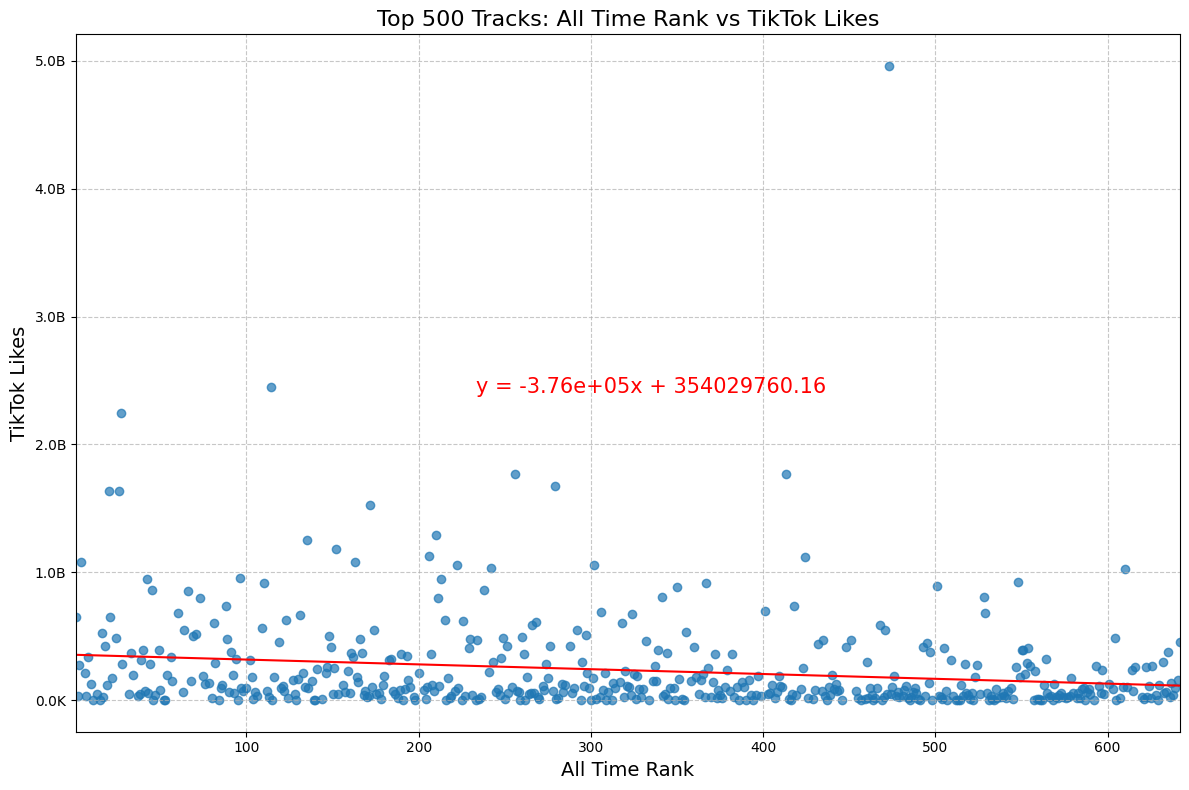

Correlation between All Time Rank and TikTok Likes for top 500: -0.1783
R-squared: 0.0318

Statistics for Top 500 tracks:
Average All Time Rank: 326.72
Average TikTok Likes: 231,097,435
Best (Lowest) All Time Rank: 1
Worst (Highest) All Time Rank: 642
Highest TikTok Likes: 4,959,548,763


In [51]:
# Sort the dataframe by All Time Rank in ascending order and take the top 500
top_500 = spotify_likes_data_clean.sort_values('All Time Rank', ascending=True).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500['All Time Rank'], 
            top_500['TikTok Likes'], 
            alpha=0.7)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500['All Time Rank'], 
                                                            top_500['TikTok Likes'])
line = slope * top_500['All Time Rank'] + intercept

# Plot the line of best fit
plt.plot(top_500['All Time Rank'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = top_500['All Time Rank'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(10, 200), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('All Time Rank', fontsize=14)
plt.ylabel('TikTok Likes', fontsize=14)
plt.title('Top 500 Tracks: All Time Rank vs TikTok Likes', fontsize=16)

# Format y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set x-axis limits to the range of the top 500
min_rank = top_500['All Time Rank'].min()
max_rank = top_500['All Time Rank'].max()
plt.xlim(min_rank, max_rank)  # This sets the x-axis range

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500['All Time Rank'].corr(top_500['TikTok Likes'])
print(f"Correlation between All Time Rank and TikTok Likes for top 500: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Print some statistics
print("\nStatistics for Top 500 tracks:")
print(f"Average All Time Rank: {top_500['All Time Rank'].mean():.2f}")
print(f"Average TikTok Likes: {top_500['TikTok Likes'].mean():,.0f}")
print(f"Best (Lowest) All Time Rank: {top_500['All Time Rank'].min():.0f}")
print(f"Worst (Highest) All Time Rank: {top_500['All Time Rank'].max():.0f}")
print(f"Highest TikTok Likes: {top_500['TikTok Likes'].max():,.0f}")

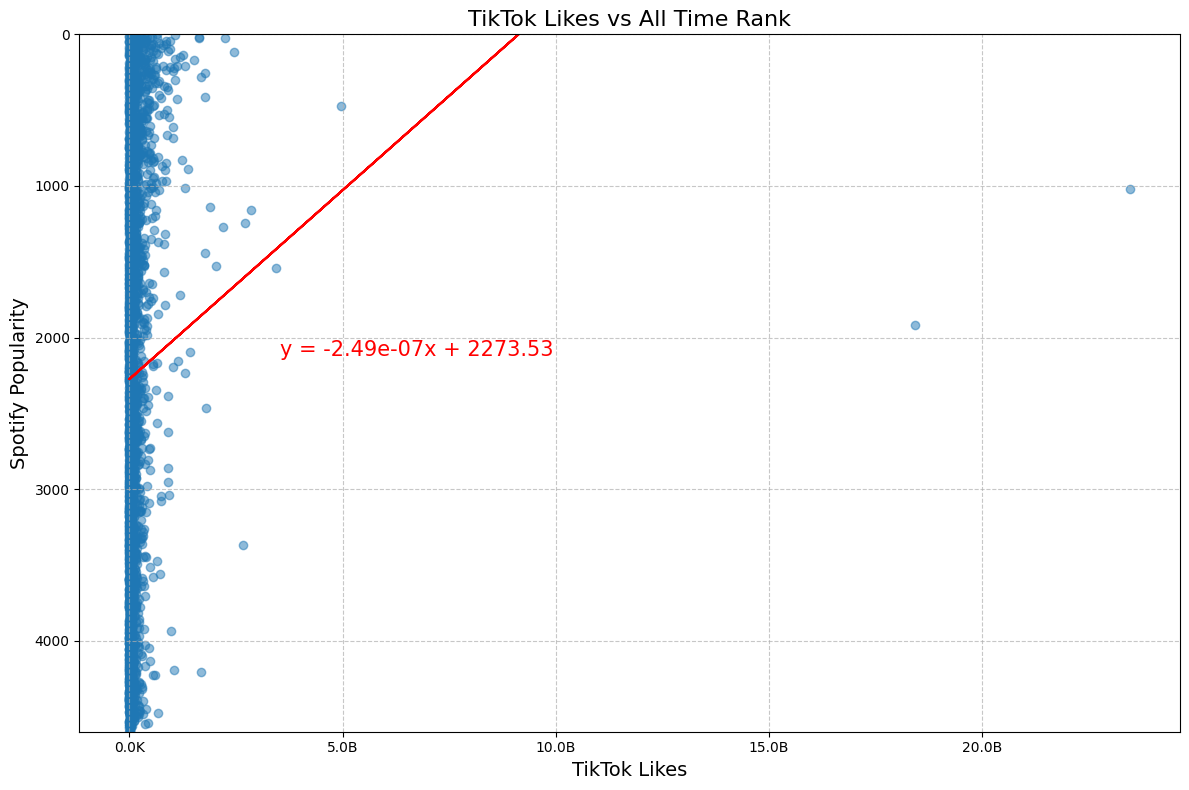

Correlation between TikTok Likes and All Time Rank: -0.1068


In [52]:
# Tickers formatting so as to not impact data analysis
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(spotify_likes_data_clean['TikTok Likes'], 
            spotify_likes_data_clean['All Time Rank'], 
            alpha=0.5)  # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(spotify_likes_data_clean['TikTok Likes'], 
                                                            spotify_likes_data_clean['All Time Rank'])
line = slope * spotify_likes_data_clean['TikTok Likes'] + intercept

# Plot the line of best fit
plt.plot(spotify_likes_data_clean['TikTok Likes'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = top_500['TikTok Likes'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('TikTok Likes', fontsize=14)
plt.ylabel('Spotify Popularity', fontsize=14)
plt.title('TikTok Likes vs All Time Rank', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits and invert y-axis
max_rank = spotify_likes_data_clean['All Time Rank'].max()
plt.ylim(max_rank, 0)  # This inverts the y-axis

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = spotify_likes_data_clean['TikTok Likes'].corr(spotify_likes_data_clean['All Time Rank'])
print(f"Correlation between TikTok Likes and All Time Rank: {correlation:.4f}")

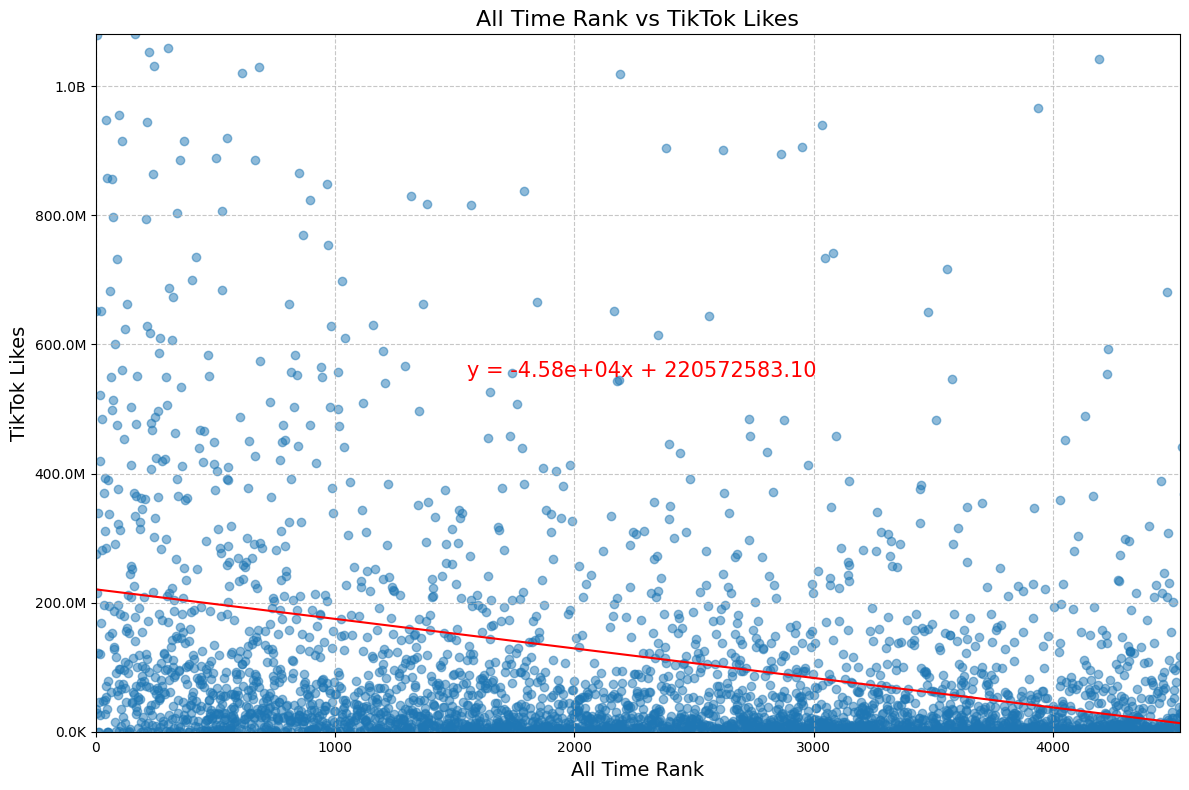

Correlation between All Time Rank and TikTok Likes: -0.1068
R-squared: 0.0114


In [53]:
# Tickers formatting so as to not impact data analysis
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(spotify_likes_data_clean['All Time Rank'], 
            spotify_likes_data_clean['TikTok Likes'], 
            alpha=0.5)  # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(spotify_likes_data_clean['All Time Rank'], 
                                                            spotify_likes_data_clean['TikTok Likes'])
line = slope * spotify_likes_data_clean['All Time Rank'] + intercept

# Plot the line of best fit
plt.plot(spotify_likes_data_clean['All Time Rank'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = spotify_likes_data_clean['All Time Rank'].median()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(10, 200), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('All Time Rank', fontsize=14)
plt.ylabel('TikTok Likes', fontsize=14)
plt.title('All Time Rank vs TikTok Likes', fontsize=16)

# Format y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set x-axis limits (cap at 99th percentile to remove extreme outliers)
max_rank = np.percentile(spotify_likes_data_clean['All Time Rank'], 99)
plt.xlim(0, max_rank)

# Set y-axis limits (cap at 99th percentile to remove extreme outliers)
max_likes = np.percentile(spotify_likes_data_clean['TikTok Likes'], 99)
plt.ylim(0, max_likes)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = spotify_likes_data_clean['All Time Rank'].corr(spotify_likes_data_clean['TikTok Likes'])
print(f"Correlation between All Time Rank and TikTok Likes: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

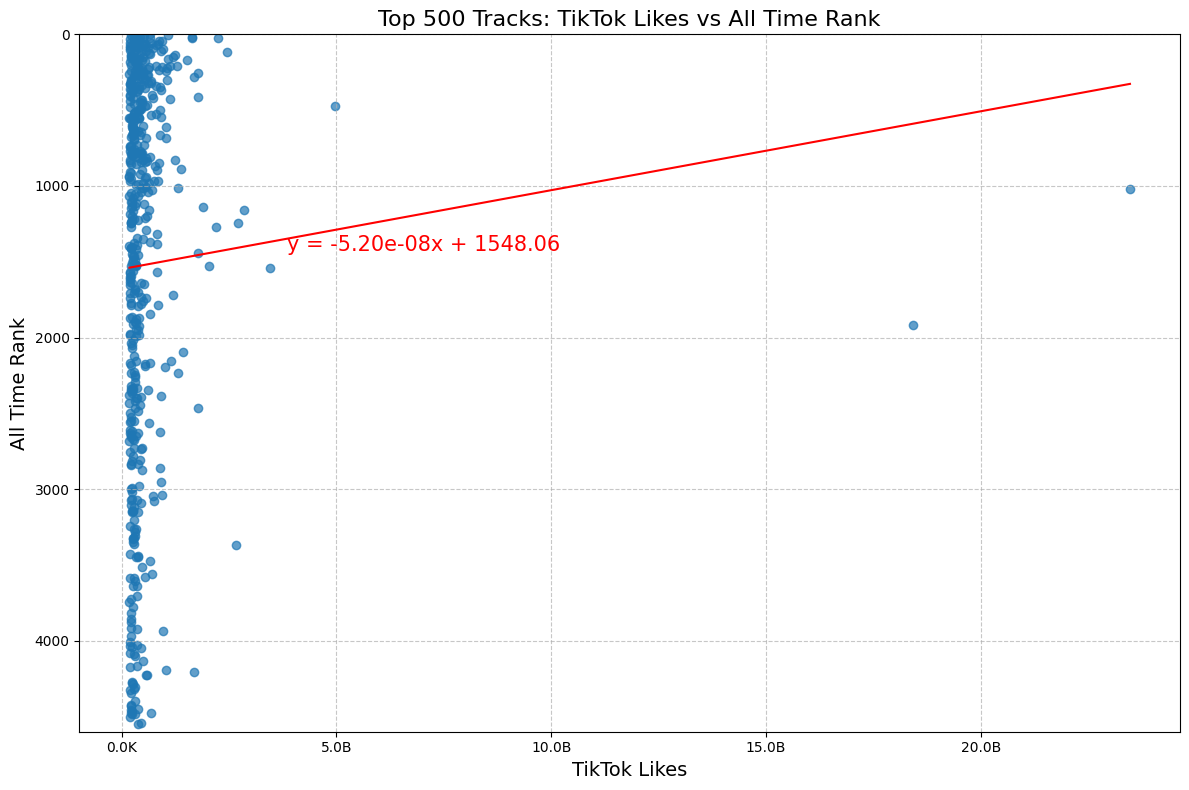

Correlation between TikTok Likes and All Time Rank for top 500: -0.0553
R-squared: 0.0031

Statistics for Top 500 tracks:
Average TikTok Likes: 563,284,838
Average All Time Rank: 1518.75
Highest TikTok Likes: 23,474,223,833
Best (Lowest) All Time Rank: 1


In [54]:
# Sort the dataframe by TikTok Likes in descending order and take the top 500
top_500 = spotify_likes_data_clean.sort_values('TikTok Likes', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500['TikTok Likes'], 
            top_500['All Time Rank'], 
            alpha=0.7)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500['TikTok Likes'], 
                                                            top_500['All Time Rank'])
line = slope * top_500['TikTok Likes'] + intercept

# Plot the line of best fit
plt.plot(top_500['TikTok Likes'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = top_500['TikTok Likes'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('TikTok Likes', fontsize=14)
plt.ylabel('All Time Rank', fontsize=14)
plt.title('Top 500 Tracks: TikTok Likes vs All Time Rank', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits and invert y-axis
max_rank = spotify_likes_data_clean['All Time Rank'].max()
plt.ylim(max_rank, 0)  # This sets the y-axis range and inverts it

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500['TikTok Likes'].corr(top_500['All Time Rank'])
print(f"Correlation between TikTok Likes and All Time Rank for top 500: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Print some statistics
print("\nStatistics for Top 500 tracks:")
print(f"Average TikTok Likes: {top_500['TikTok Likes'].mean():,.0f}")
print(f"Average All Time Rank: {top_500['All Time Rank'].mean():.2f}")
print(f"Highest TikTok Likes: {top_500['TikTok Likes'].max():,.0f}")
print(f"Best (Lowest) All Time Rank: {top_500['All Time Rank'].min():.0f}")

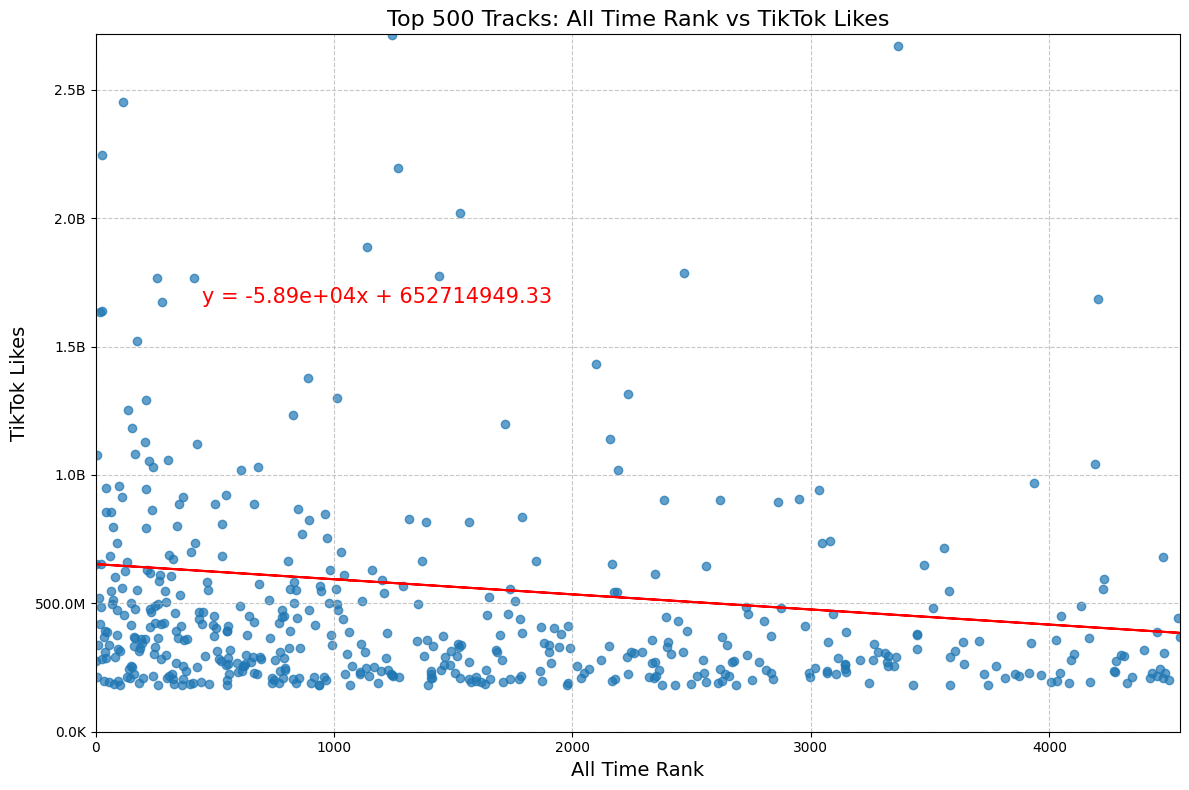

Correlation between All Time Rank and TikTok Likes for top 500: -0.0553
R-squared: 0.0031

Statistics for Top 500 tracks:
Average All Time Rank: 1518.75
Average TikTok Likes: 563,284,838
Best (Lowest) All Time Rank: 1
Worst (Highest) All Time Rank: 4548
Highest TikTok Likes: 23,474,223,833


In [55]:
# Sort the dataframe by TikTok Likes in descending order and take the top 500
top_500 = spotify_likes_data_clean.sort_values('TikTok Likes', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500['All Time Rank'], 
            top_500['TikTok Likes'], 
            alpha=0.7)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500['All Time Rank'], 
                                                            top_500['TikTok Likes'])
line = slope * top_500['All Time Rank'] + intercept

# Plot the line of best fit
plt.plot(top_500['All Time Rank'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = top_500['All Time Rank'].median()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(10, 200), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('All Time Rank', fontsize=14)
plt.ylabel('TikTok Likes', fontsize=14)
plt.title('Top 500 Tracks: All Time Rank vs TikTok Likes', fontsize=16)

# Format y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set x-axis limits
plt.xlim(0, top_500['All Time Rank'].max())

# Set y-axis limits (cap at 99th percentile to remove extreme outliers)
max_likes = np.percentile(top_500['TikTok Likes'], 99)
plt.ylim(0, max_likes)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500['All Time Rank'].corr(top_500['TikTok Likes'])
print(f"Correlation between All Time Rank and TikTok Likes for top 500: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Print some statistics
print("\nStatistics for Top 500 tracks:")
print(f"Average All Time Rank: {top_500['All Time Rank'].mean():.2f}")
print(f"Average TikTok Likes: {top_500['TikTok Likes'].mean():,.0f}")
print(f"Best (Lowest) All Time Rank: {top_500['All Time Rank'].min():.0f}")
print(f"Worst (Highest) All Time Rank: {top_500['All Time Rank'].max():.0f}")
print(f"Highest TikTok Likes: {top_500['TikTok Likes'].max():,.0f}")

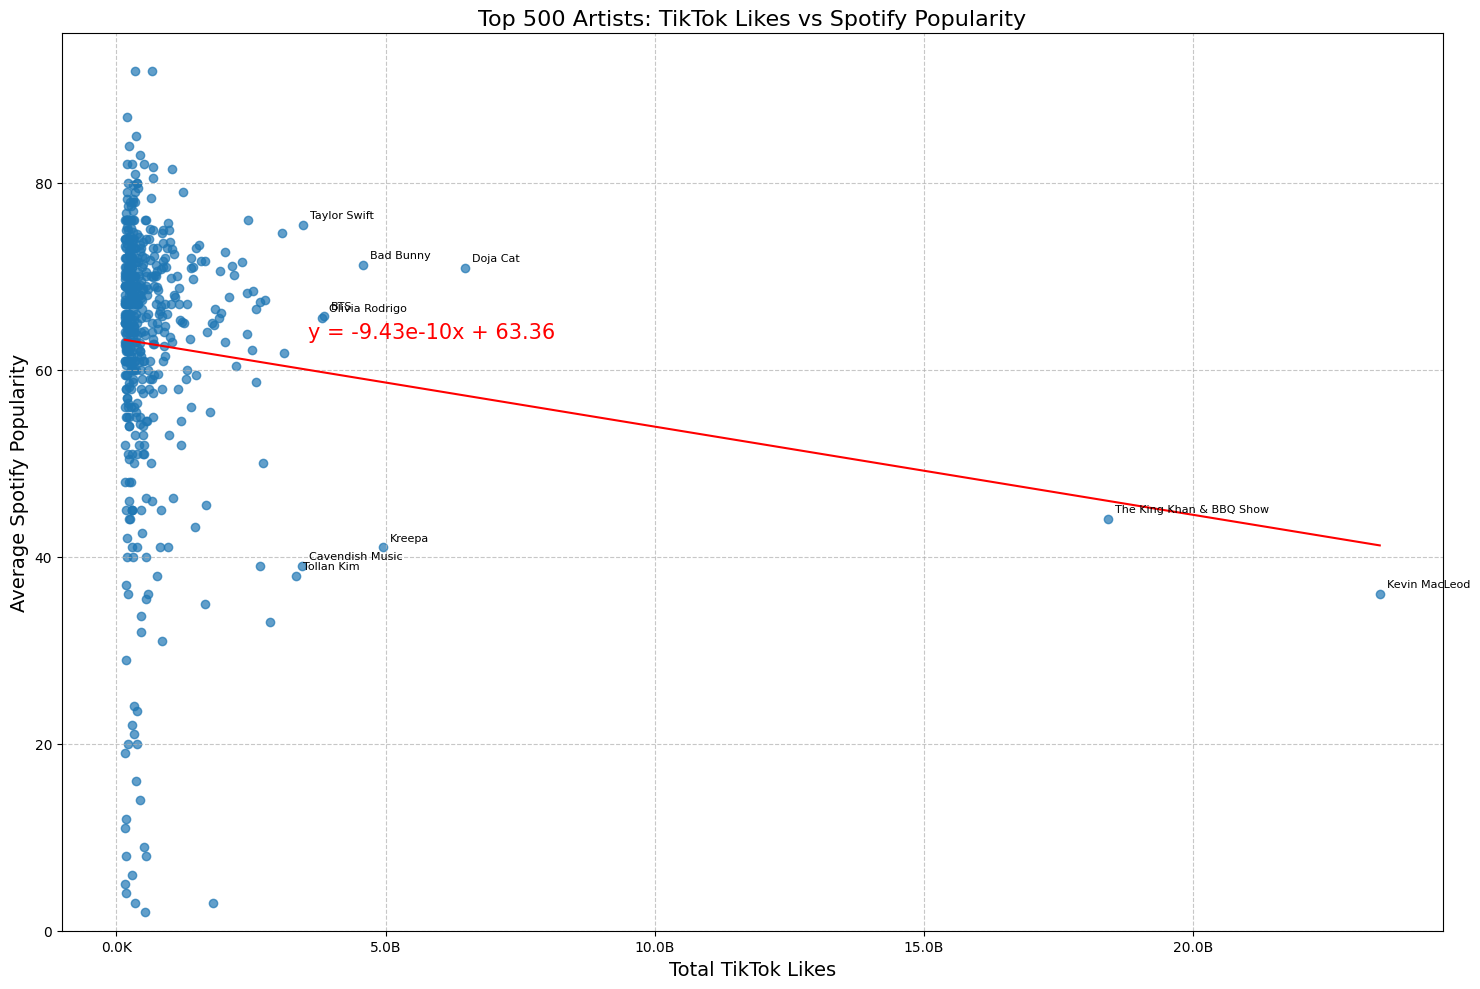

Correlation between TikTok Likes and Spotify Popularity for top 500 artists: -0.0970
R-squared: 0.0094

Statistics for Top 500 artists:
Average Total TikTok Likes: 701,287,561
Average Spotify Popularity: 62.70
Highest Total TikTok Likes: 23,474,223,833
Highest Average Spotify Popularity: 92.00

Top 10 Artists by TikTok Likes:
         Artist           TikTok Likes  Spotify Popularity
           Kevin MacLeod 23,474,223,833       36.00       
The King Khan & BBQ Show 18,422,696,340       44.00       
                Doja Cat  6,472,845,648       70.86       
                  Kreepa  4,959,548,763       41.00       
               Bad Bunny  4,574,175,191       71.22       
                     BTS  3,854,446,026       65.77       
          Olivia Rodrigo  3,822,383,958       65.60       
            Taylor Swift  3,462,138,949       75.51       
         Cavendish Music  3,448,214,061       39.00       
              Tollan Kim  3,341,284,543       38.00       


C:\Users\rdina\AppData\Local\Temp\ipykernel_40164\2312473496.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['TikTok Likes'] = top_10_artists['TikTok Likes'].apply(lambda x: f'{x:,.0f}')
C:\Users\rdina\AppData\Local\Temp\ipykernel_40164\2312473496.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['Spotify Popularity'] = top_10_artists['Spotify Popularity'].apply(lambda x: f'{x:.2f}')


In [56]:
# Aggregate data by artist
artist_data = spotify_likes_data_clean.groupby('Artist').agg({
    'TikTok Likes': 'sum',
    'Spotify Popularity': 'mean'
}).reset_index()

# Sort by TikTok Likes and get top 500
top_500_artists = artist_data.sort_values('TikTok Likes', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(top_500_artists['TikTok Likes'], top_500_artists['Spotify Popularity'], alpha=0.7)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500_artists['TikTok Likes'], 
                                                            top_500_artists['Spotify Popularity'])
line = slope * top_500_artists['TikTok Likes'] + intercept

# Plot the line of best fit
plt.plot(top_500_artists['TikTok Likes'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = top_500_artists['TikTok Likes'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,5), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('Total TikTok Likes', fontsize=14)
plt.ylabel('Average Spotify Popularity', fontsize=14)
plt.title('Top 500 Artists: TikTok Likes vs Spotify Popularity', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits
max_popularity = artist_data['Spotify Popularity'].max()
plt.ylim(0, max_popularity)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate some top artists
for i, row in top_500_artists.head(10).iterrows():
    plt.annotate(row['Artist'], (row['TikTok Likes'], row['Spotify Popularity']), 
                 xytext=(5,5), textcoords='offset points', fontsize=8)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500_artists['TikTok Likes'].corr(top_500_artists['Spotify Popularity'])
print(f"Correlation between TikTok Likes and Spotify Popularity for top 500 artists: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Print some statistics
print("\nStatistics for Top 500 artists:")
print(f"Average Total TikTok Likes: {top_500_artists['TikTok Likes'].mean():,.0f}")
print(f"Average Spotify Popularity: {top_500_artists['Spotify Popularity'].mean():.2f}")
print(f"Highest Total TikTok Likes: {top_500_artists['TikTok Likes'].max():,.0f}")
print(f"Highest Average Spotify Popularity: {top_500_artists['Spotify Popularity'].max():.2f}")

# Format and print top 10 artists by TikTok Likes
print("\nTop 10 Artists by TikTok Likes:")
top_10_artists = top_500_artists.head(10)

# Format TikTok Likes
top_10_artists['TikTok Likes'] = top_10_artists['TikTok Likes'].apply(lambda x: f'{x:,.0f}')

# Format Spotify Popularity
top_10_artists['Spotify Popularity'] = top_10_artists['Spotify Popularity'].apply(lambda x: f'{x:.2f}')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# Print the formatted dataframe
print(top_10_artists.to_string(index=False))

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.colheader_justify')

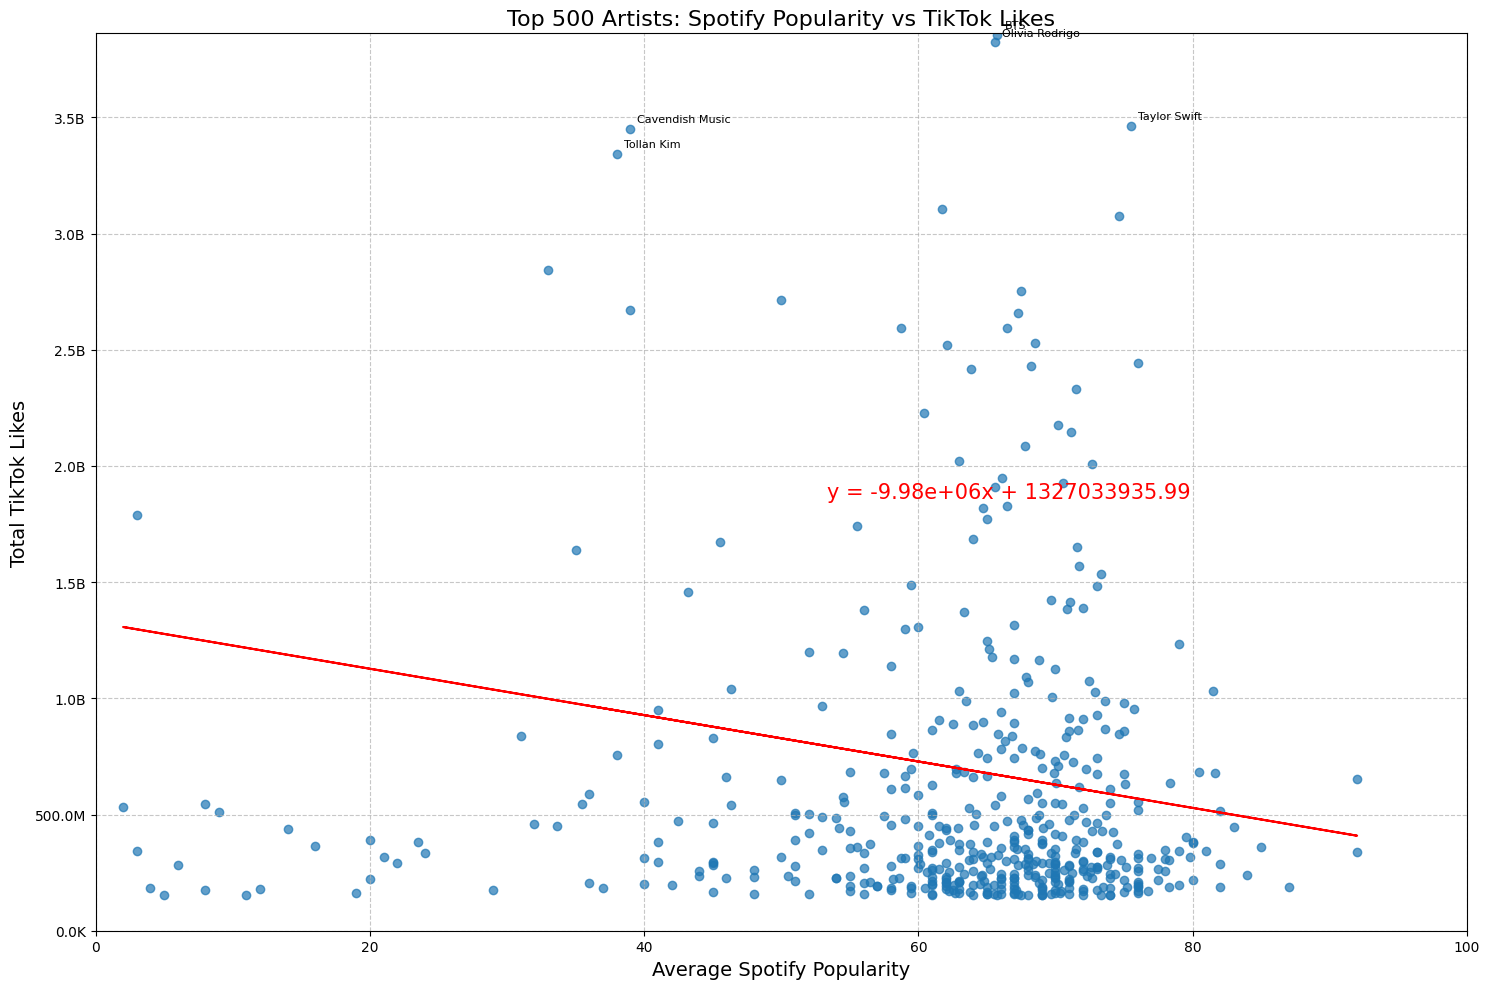

Correlation between Spotify Popularity and TikTok Likes for top 500 artists: -0.0970
R-squared: 0.0094

Statistics for Top 500 artists:
Average Spotify Popularity: 62.70
Average Total TikTok Likes: 701,287,561
Highest Average Spotify Popularity: 92.00
Highest Total TikTok Likes: 23,474,223,833

Top 10 Artists by TikTok Likes:
         Artist           TikTok Likes  Spotify Popularity
           Kevin MacLeod 23,474,223,833       36.00       
The King Khan & BBQ Show 18,422,696,340       44.00       
                Doja Cat  6,472,845,648       70.86       
                  Kreepa  4,959,548,763       41.00       
               Bad Bunny  4,574,175,191       71.22       
                     BTS  3,854,446,026       65.77       
          Olivia Rodrigo  3,822,383,958       65.60       
            Taylor Swift  3,462,138,949       75.51       
         Cavendish Music  3,448,214,061       39.00       
              Tollan Kim  3,341,284,543       38.00       


C:\Users\rdina\AppData\Local\Temp\ipykernel_40164\2035888872.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['TikTok Likes'] = top_10_artists['TikTok Likes'].apply(lambda x: f'{x:,.0f}')
C:\Users\rdina\AppData\Local\Temp\ipykernel_40164\2035888872.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['Spotify Popularity'] = top_10_artists['Spotify Popularity'].apply(lambda x: f'{x:.2f}')


In [57]:
# Aggregate data by artist
artist_data = spotify_likes_data_clean.groupby('Artist').agg({
    'TikTok Likes': 'sum',
    'Spotify Popularity': 'mean'
}).reset_index()

# Sort by TikTok Likes and get top 500
top_500_artists = artist_data.sort_values('TikTok Likes', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(top_500_artists['Spotify Popularity'], top_500_artists['TikTok Likes'], alpha=0.7)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500_artists['Spotify Popularity'], 
                                                            top_500_artists['TikTok Likes'])
line = slope * top_500_artists['Spotify Popularity'] + intercept

# Plot the line of best fit
plt.plot(top_500_artists['Spotify Popularity'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = top_500_artists['Spotify Popularity'].median()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(5, 200), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('Average Spotify Popularity', fontsize=14)
plt.ylabel('Total TikTok Likes', fontsize=14)
plt.title('Top 500 Artists: Spotify Popularity vs TikTok Likes', fontsize=16)

# Format y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set x-axis limits
plt.xlim(0, 100)  # Spotify popularity typically ranges from 0 to 100

# Set y-axis limits (cap at 99th percentile to remove extreme outliers)
max_likes = np.percentile(top_500_artists['TikTok Likes'], 99)
plt.ylim(0, max_likes)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate some top artists
for i, row in top_500_artists.head(10).iterrows():
    plt.annotate(row['Artist'], (row['Spotify Popularity'], row['TikTok Likes']), 
                 xytext=(5,5), textcoords='offset points', fontsize=8)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500_artists['Spotify Popularity'].corr(top_500_artists['TikTok Likes'])
print(f"Correlation between Spotify Popularity and TikTok Likes for top 500 artists: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Print some statistics
print("\nStatistics for Top 500 artists:")
print(f"Average Spotify Popularity: {top_500_artists['Spotify Popularity'].mean():.2f}")
print(f"Average Total TikTok Likes: {top_500_artists['TikTok Likes'].mean():,.0f}")
print(f"Highest Average Spotify Popularity: {top_500_artists['Spotify Popularity'].max():.2f}")
print(f"Highest Total TikTok Likes: {top_500_artists['TikTok Likes'].max():,.0f}")

# Format and print top 10 artists by TikTok Likes
print("\nTop 10 Artists by TikTok Likes:")
top_10_artists = top_500_artists.head(10)

# Format TikTok Likes
top_10_artists['TikTok Likes'] = top_10_artists['TikTok Likes'].apply(lambda x: f'{x:,.0f}')

# Format Spotify Popularity
top_10_artists['Spotify Popularity'] = top_10_artists['Spotify Popularity'].apply(lambda x: f'{x:.2f}')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# Print the formatted dataframe
print(top_10_artists.to_string(index=False))

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.colheader_justify')

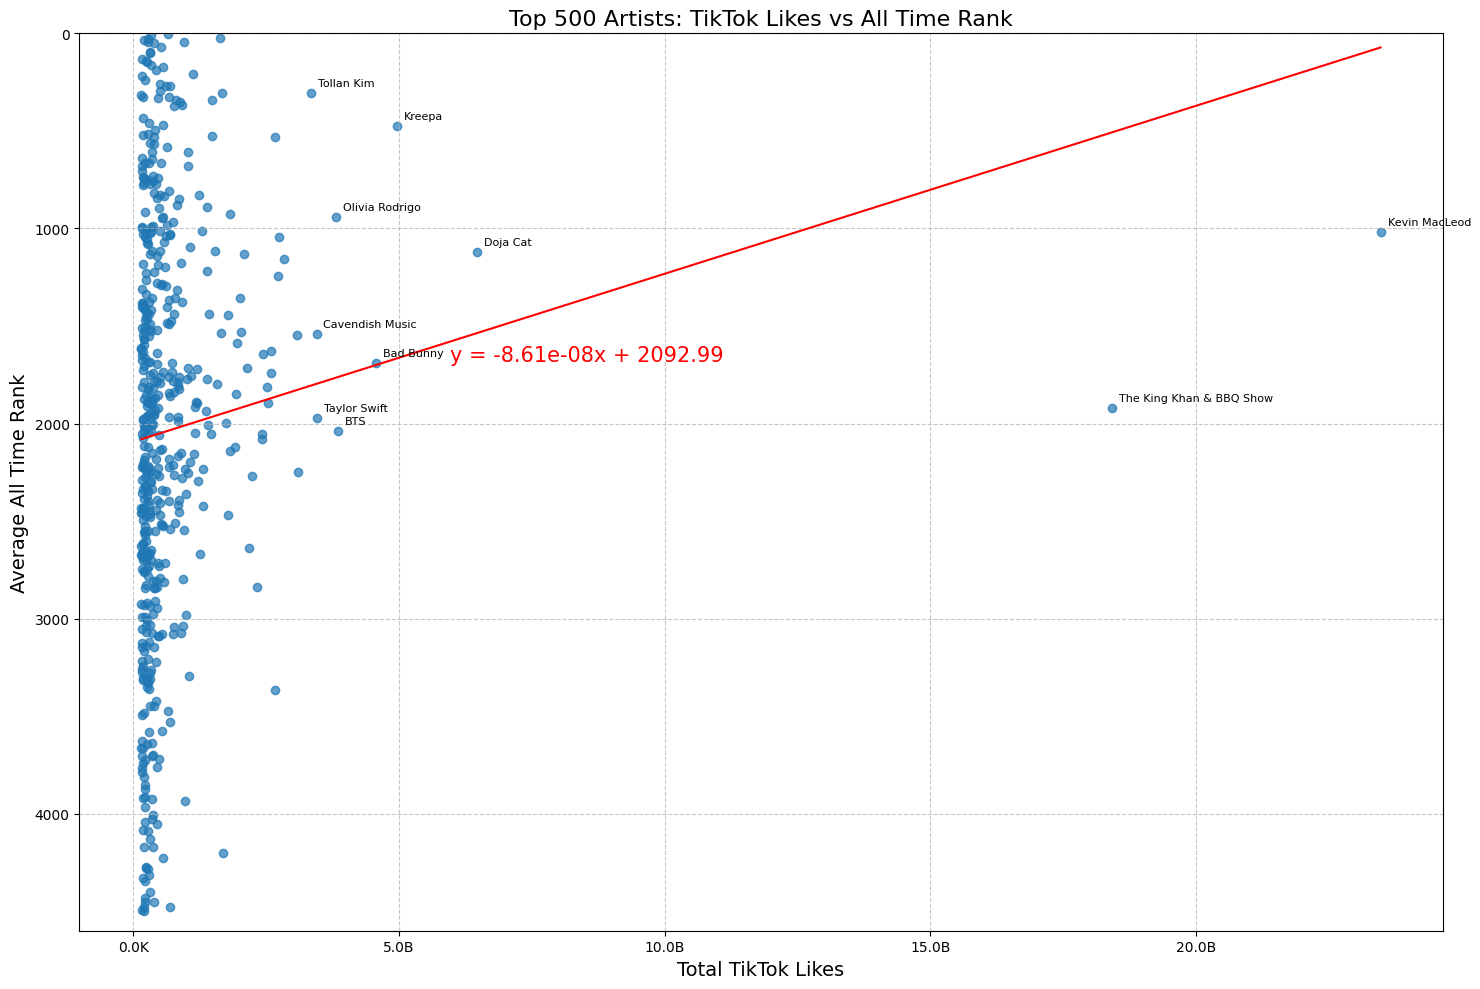

Correlation between TikTok Likes and All Time Rank for top 500 artists: -0.1202
R-squared: 0.0145

Statistics for Top 500 artists:
Average Total TikTok Likes: 701,287,561
Average All Time Rank: 2032.63
Highest Total TikTok Likes: 23,474,223,833
Best (Lowest) Average All Time Rank: 1.00

Top 10 Artists by TikTok Likes:
         Artist           TikTok Likes  All Time Rank
           Kevin MacLeod 23,474,223,833    1018.00   
The King Khan & BBQ Show 18,422,696,340    1918.00   
                Doja Cat  6,472,845,648    1120.00   
                  Kreepa  4,959,548,763     473.00   
               Bad Bunny  4,574,175,191    1690.93   
                     BTS  3,854,446,026    2037.46   
          Olivia Rodrigo  3,822,383,958     942.50   
            Taylor Swift  3,462,138,949    1970.29   
         Cavendish Music  3,448,214,061    1539.00   
              Tollan Kim  3,341,284,543     307.50   


C:\Users\rdina\AppData\Local\Temp\ipykernel_40164\408765745.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['TikTok Likes'] = top_10_artists['TikTok Likes'].apply(lambda x: f'{x:,.0f}')
C:\Users\rdina\AppData\Local\Temp\ipykernel_40164\408765745.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['All Time Rank'] = top_10_artists['All Time Rank'].apply(lambda x: f'{x:.2f}')


In [58]:
# Aggregate data by artist
artist_data = spotify_likes_data_clean.groupby('Artist').agg({
    'TikTok Likes': 'sum',
    'All Time Rank': 'mean'  # Changed from 'Spotify Popularity' to 'All Time Rank'
}).reset_index()

# Sort by TikTok Likes and get top 500
top_500_artists = artist_data.sort_values('TikTok Likes', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(top_500_artists['TikTok Likes'], top_500_artists['All Time Rank'], alpha=0.7)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500_artists['TikTok Likes'], 
                                                            top_500_artists['All Time Rank'])
line = slope * top_500_artists['TikTok Likes'] + intercept

# Plot the line of best fit
plt.plot(top_500_artists['TikTok Likes'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = top_500_artists['TikTok Likes'].mean()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(300,50), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('Total TikTok Likes', fontsize=14)
plt.ylabel('Average All Time Rank', fontsize=14)
plt.title('Top 500 Artists: TikTok Likes vs All Time Rank', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits and invert y-axis
max_rank = artist_data['All Time Rank'].max()
plt.ylim(max_rank, 0)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate some top artists
for i, row in top_500_artists.head(10).iterrows():
    plt.annotate(row['Artist'], (row['TikTok Likes'], row['All Time Rank']), 
                 xytext=(5,5), textcoords='offset points', fontsize=8)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500_artists['TikTok Likes'].corr(top_500_artists['All Time Rank'])
print(f"Correlation between TikTok Likes and All Time Rank for top 500 artists: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Print some statistics
print("\nStatistics for Top 500 artists:")
print(f"Average Total TikTok Likes: {top_500_artists['TikTok Likes'].mean():,.0f}")
print(f"Average All Time Rank: {top_500_artists['All Time Rank'].mean():.2f}")
print(f"Highest Total TikTok Likes: {top_500_artists['TikTok Likes'].max():,.0f}")
print(f"Best (Lowest) Average All Time Rank: {top_500_artists['All Time Rank'].min():.2f}")

# Format and print top 10 artists by TikTok Likes
print("\nTop 10 Artists by TikTok Likes:")
top_10_artists = top_500_artists.head(10)

# Format TikTok Likes
top_10_artists['TikTok Likes'] = top_10_artists['TikTok Likes'].apply(lambda x: f'{x:,.0f}')

# Format All Time Rank
top_10_artists['All Time Rank'] = top_10_artists['All Time Rank'].apply(lambda x: f'{x:.2f}')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# Print the formatted dataframe
print(top_10_artists.to_string(index=False))

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.colheader_justify')

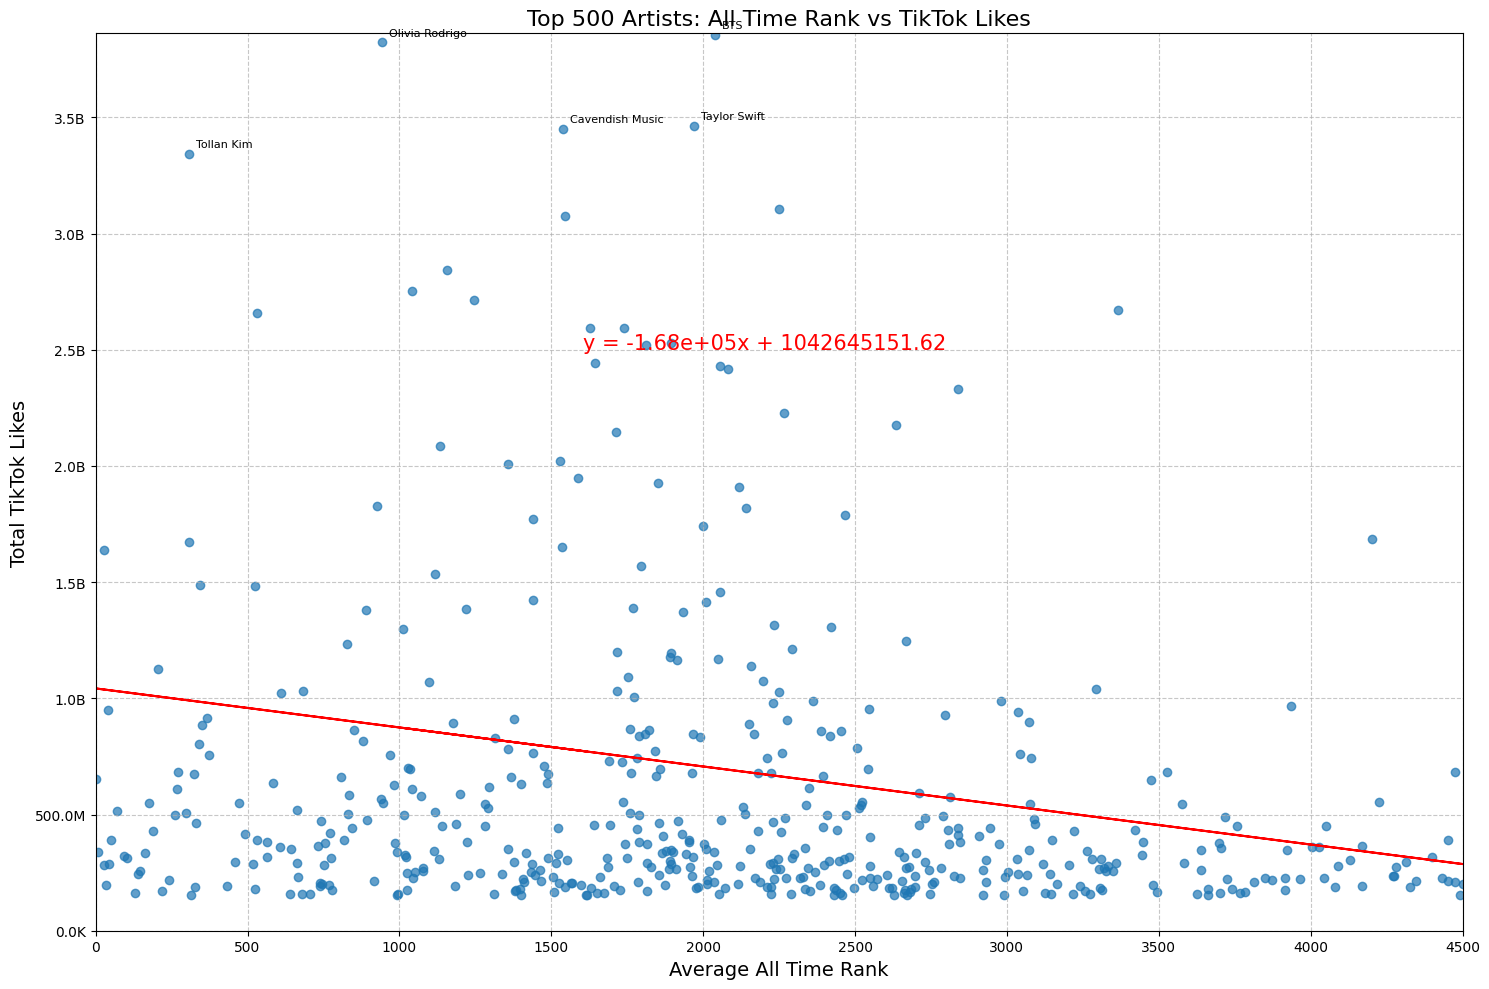

Correlation between All Time Rank and TikTok Likes for top 500 artists: -0.1202
R-squared: 0.0145

Statistics for Top 500 artists:
Average All Time Rank: 2032.63
Average Total TikTok Likes: 701,287,561
Best (Lowest) Average All Time Rank: 1.00
Worst (Highest) Average All Time Rank: 4500.00
Highest Total TikTok Likes: 23,474,223,833

Top 10 Artists by TikTok Likes:
         Artist           TikTok Likes  All Time Rank
           Kevin MacLeod 23,474,223,833    1018.00   
The King Khan & BBQ Show 18,422,696,340    1918.00   
                Doja Cat  6,472,845,648    1120.00   
                  Kreepa  4,959,548,763     473.00   
               Bad Bunny  4,574,175,191    1690.93   
                     BTS  3,854,446,026    2037.46   
          Olivia Rodrigo  3,822,383,958     942.50   
            Taylor Swift  3,462,138,949    1970.29   
         Cavendish Music  3,448,214,061    1539.00   
              Tollan Kim  3,341,284,543     307.50   


C:\Users\rdina\AppData\Local\Temp\ipykernel_40164\4283350701.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['TikTok Likes'] = top_10_artists['TikTok Likes'].apply(lambda x: f'{x:,.0f}')
C:\Users\rdina\AppData\Local\Temp\ipykernel_40164\4283350701.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_artists['All Time Rank'] = top_10_artists['All Time Rank'].apply(lambda x: f'{x:.2f}')


In [59]:
# Aggregate data by artist
artist_data = spotify_likes_data_clean.groupby('Artist').agg({
    'TikTok Likes': 'sum',
    'All Time Rank': 'mean'  # Changed from 'Spotify Popularity' to 'All Time Rank'
}).reset_index()

# Sort by TikTok Likes and get top 500
top_500_artists = artist_data.sort_values('TikTok Likes', ascending=False).head(500)

def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'
    else:
        return f'{x/1e3:.1f}K'

# Create the scatter plot
plt.figure(figsize=(15, 10))
plt.scatter(top_500_artists['All Time Rank'], top_500_artists['TikTok Likes'], alpha=0.7)

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500_artists['All Time Rank'], 
                                                            top_500_artists['TikTok Likes'])
line = slope * top_500_artists['All Time Rank'] + intercept

# Plot the line of best fit
plt.plot(top_500_artists['All Time Rank'], line, color='r', label=f'y = {slope:.2e}x + {intercept:.2f}')

# Add the formula as a label on the graph
x_pos = top_500_artists['All Time Rank'].median()  # x-position for the label
y_pos = slope * x_pos + intercept  # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(50, 300), 
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('Average All Time Rank', fontsize=14)
plt.ylabel('Total TikTok Likes', fontsize=14)
plt.title('Top 500 Artists: All Time Rank vs TikTok Likes', fontsize=16)

# Format y-axis ticks
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set x-axis limits
plt.xlim(0, top_500_artists['All Time Rank'].max())

# Set y-axis limits (cap at 99th percentile to remove extreme outliers)
max_likes = np.percentile(top_500_artists['TikTok Likes'], 99)
plt.ylim(0, max_likes)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Annotate some top artists
for i, row in top_500_artists.head(10).iterrows():
    plt.annotate(row['Artist'], (row['All Time Rank'], row['TikTok Likes']), 
                 xytext=(5,5), textcoords='offset points', fontsize=8)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation for the top 500
correlation = top_500_artists['All Time Rank'].corr(top_500_artists['TikTok Likes'])
print(f"Correlation between All Time Rank and TikTok Likes for top 500 artists: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

# Print some statistics
print("\nStatistics for Top 500 artists:")
print(f"Average All Time Rank: {top_500_artists['All Time Rank'].mean():.2f}")
print(f"Average Total TikTok Likes: {top_500_artists['TikTok Likes'].mean():,.0f}")
print(f"Best (Lowest) Average All Time Rank: {top_500_artists['All Time Rank'].min():.2f}")
print(f"Worst (Highest) Average All Time Rank: {top_500_artists['All Time Rank'].max():.2f}")
print(f"Highest Total TikTok Likes: {top_500_artists['TikTok Likes'].max():,.0f}")

# Format and print top 10 artists by TikTok Likes
print("\nTop 10 Artists by TikTok Likes:")
top_10_artists = top_500_artists.head(10)

# Format TikTok Likes
top_10_artists['TikTok Likes'] = top_10_artists['TikTok Likes'].apply(lambda x: f'{x:,.0f}')

# Format All Time Rank
top_10_artists['All Time Rank'] = top_10_artists['All Time Rank'].apply(lambda x: f'{x:.2f}')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# Print the formatted dataframe
print(top_10_artists.to_string(index=False))

# Reset display options to default
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.colheader_justify')

KeyError: 'Rank Percentage'

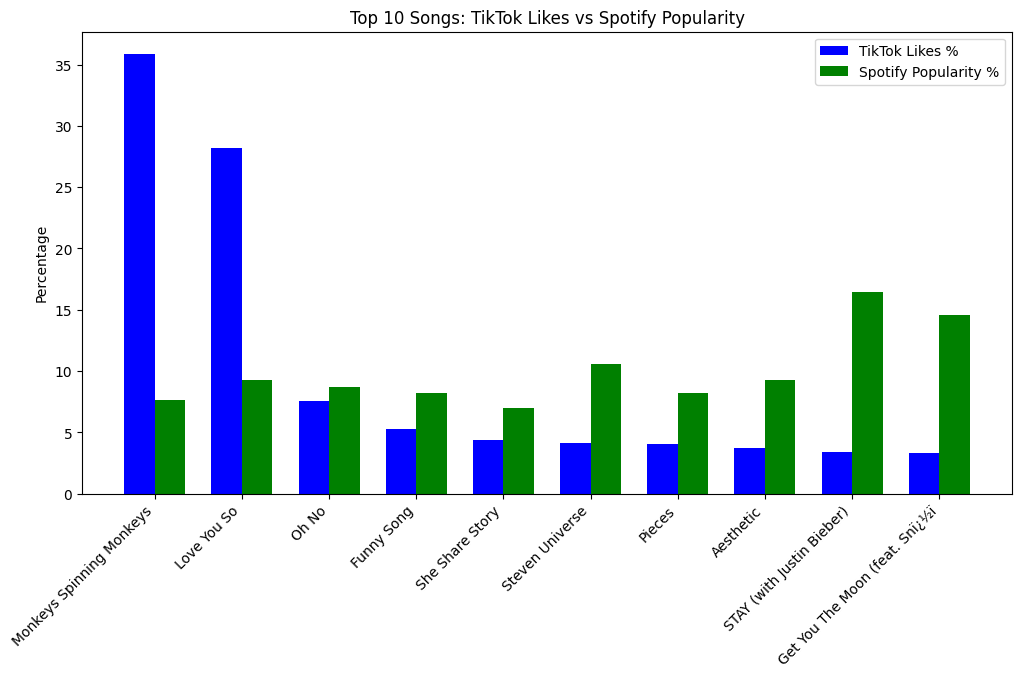

In [60]:
# Sort DataFrame by TikTok Likes in descending order and get top 10
top_ten_tiktok_df = spotify_likes_data_clean.sort_values(by='TikTok Likes', ascending=False).head(10)

# Calculate percentages
total_tiktok_likes = top_ten_tiktok_df['TikTok Likes'].sum()
total_spotify_popularity = top_ten_tiktok_df['Spotify Popularity'].sum()

top_ten_tiktok_df['TikTok Percentage'] = (top_ten_tiktok_df['TikTok Likes'] / total_tiktok_likes) * 100
top_ten_tiktok_df['Spotify Percentage'] = (top_ten_tiktok_df['Spotify Popularity'] / total_spotify_popularity) * 100

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(top_ten_tiktok_df))
width = 0.35

rects1 = ax.bar(x - width/2, top_ten_tiktok_df['TikTok Percentage'], width, label='TikTok Likes %', color='blue')
rects2 = ax.bar(x + width/2, top_ten_tiktok_df['Spotify Percentage'], width, label='Spotify Popularity %', color='green')

# Customize the chart
ax.set_ylabel('Percentage')
ax.set_title('Top 10 Songs: TikTok Likes vs Spotify Popularity')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_tiktok_df['Track'], rotation=45, ha='right')
ax.legend()

# Set y-axis limit to give more room at the top
y_max = max(top_ten_tiktok_df['TikTok Percentage'].max(), top_ten_tiktok_df['Rank Percentage'].max())
ax.set_ylim(0, y_max * 1.5)  # Add 15% more space at the top

# Add value labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Print some additional statistics
print(f"\nTotal TikTok Likes for Top 10: {total_tiktok_likes:,.0f}")
print(f"Average Spotify Popularity for Top 10: {top_ten_tiktok_df['Spotify Popularity'].mean():.2f}")
print(f"Correlation between TikTok Likes and Spotify Popularity for Top 10: {top_ten_tiktok_df['TikTok Likes'].corr(top_ten_tiktok_df['Spotify Popularity']):.4f}")

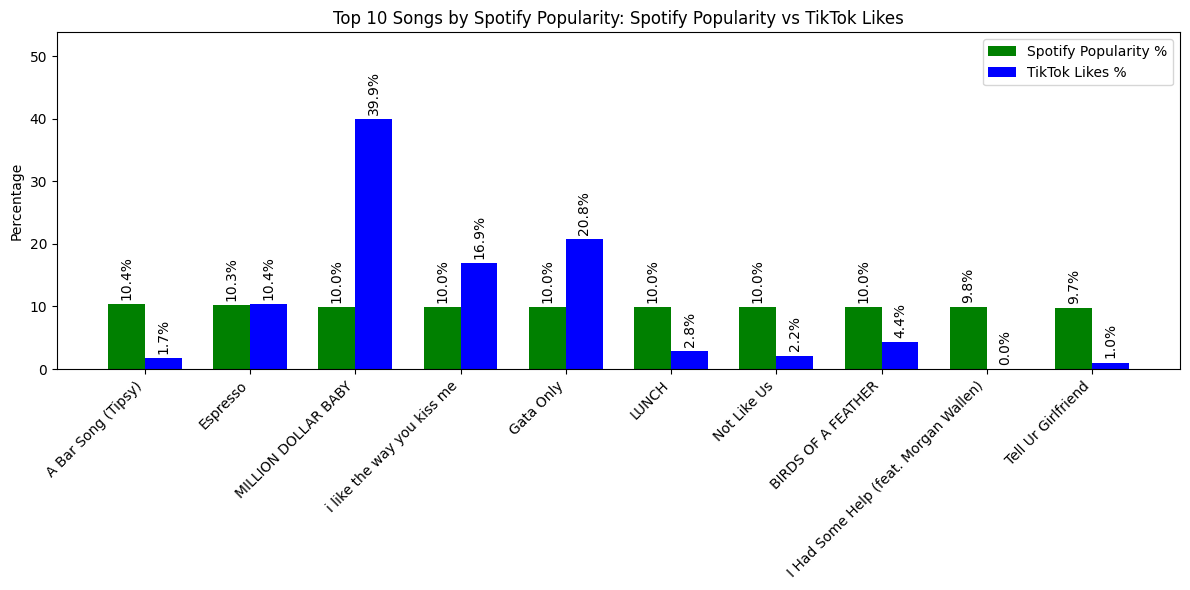


Total Spotify Popularity for Top 10: 924
Total TikTok Likes for Top 10: 1,631,175,662
Average Spotify Popularity for Top 10: 92.40
Correlation between Spotify Popularity and TikTok Likes for Top 10: -0.0203


In [38]:
# Sort DataFrame by Spotify Popularity in descending order and get top 10
top_ten_spotify_df = spotify_likes_data_clean.sort_values(by='Spotify Popularity', ascending=False).head(10)

# Calculate percentages
total_tiktok_likes = top_ten_spotify_df['TikTok Likes'].sum()
total_spotify_popularity = top_ten_spotify_df['Spotify Popularity'].sum()

top_ten_spotify_df['TikTok Percentage'] = (top_ten_spotify_df['TikTok Likes'] / total_tiktok_likes) * 100
top_ten_spotify_df['Spotify Percentage'] = (top_ten_spotify_df['Spotify Popularity'] / total_spotify_popularity) * 100

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(top_ten_spotify_df))
width = 0.35

rects1 = ax.bar(x - width/2, top_ten_spotify_df['Spotify Percentage'], width, label='Spotify Popularity %', color='green')
rects2 = ax.bar(x + width/2, top_ten_spotify_df['TikTok Percentage'], width, label='TikTok Likes %', color='blue')

# Customize the chart
ax.set_ylabel('Percentage')
ax.set_title('Top 10 Songs by Spotify Popularity: Spotify Popularity vs TikTok Likes')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_spotify_df['Track'], rotation=45, ha='right')
ax.legend()

# Set y-axis limit to give more room at the top
y_max = max(top_ten_tiktok_df['TikTok Percentage'].max(), top_ten_tiktok_df['Rank Percentage'].max())
ax.set_ylim(0, y_max * 1.5)  # Add 15% more space at the top

# Add value labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Print some additional statistics
print(f"\nTotal Spotify Popularity for Top 10: {total_spotify_popularity:.0f}")
print(f"Total TikTok Likes for Top 10: {total_tiktok_likes:,.0f}")
print(f"Average Spotify Popularity for Top 10: {top_ten_spotify_df['Spotify Popularity'].mean():.2f}")
print(f"Correlation between Spotify Popularity and TikTok Likes for Top 10: {top_ten_spotify_df['Spotify Popularity'].corr(top_ten_spotify_df['TikTok Likes']):.4f}")

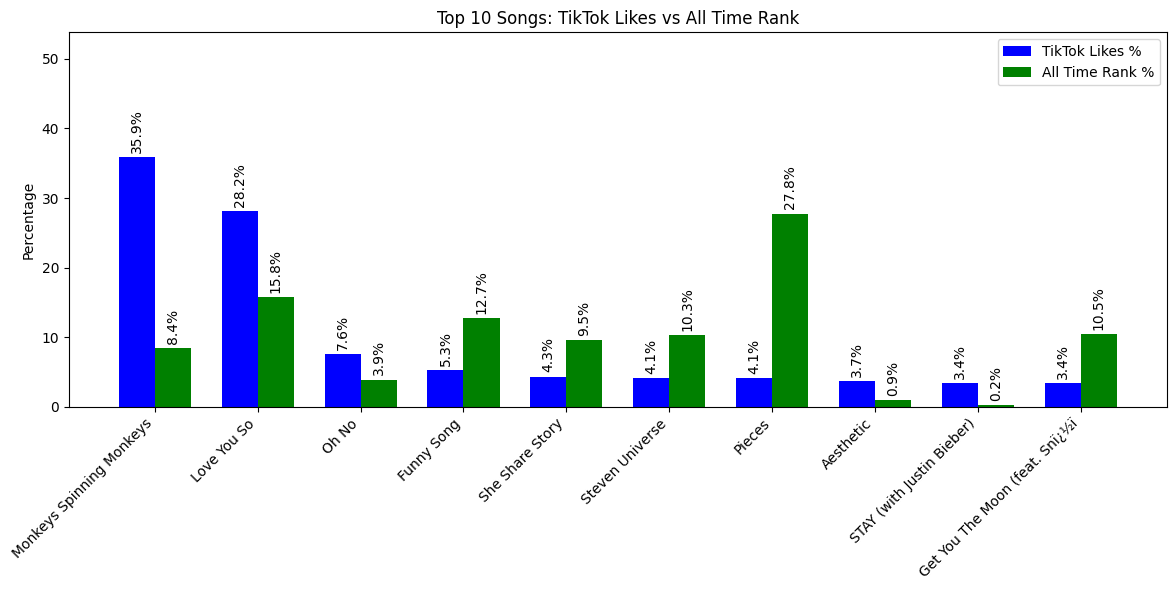


Total TikTok Likes for Top 10: 65,429,801,400
Average All Time Rank for Top 10: 1212.70
Best (Lowest) All Time Rank in Top 10: 27
Worst (Highest) All Time Rank in Top 10: 3367
Correlation between TikTok Likes and All Time Rank for Top 10: 0.0939


In [ ]:
# Sort DataFrame by TikTok Likes in descending order and get top 10
top_ten_tiktok_df = spotify_likes_data_clean.sort_values(by='TikTok Likes', ascending=False).head(10)

# Calculate percentages
total_tiktok_likes = top_ten_tiktok_df['TikTok Likes'].sum()
total_all_time_rank = top_ten_tiktok_df['All Time Rank'].sum()

top_ten_tiktok_df['TikTok Percentage'] = (top_ten_tiktok_df['TikTok Likes'] / total_tiktok_likes) * 100
top_ten_tiktok_df['Rank Percentage'] = (top_ten_tiktok_df['All Time Rank'] / total_all_time_rank) * 100

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(top_ten_tiktok_df))
width = 0.35

rects1 = ax.bar(x - width/2, top_ten_tiktok_df['TikTok Percentage'], width, label='TikTok Likes %', color='blue')
rects2 = ax.bar(x + width/2, top_ten_tiktok_df['Rank Percentage'], width, label='All Time Rank %', color='green')

# Customize the chart
ax.set_ylabel('Percentage')
ax.set_title('Top 10 Songs: TikTok Likes vs All Time Rank')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_tiktok_df['Track'], rotation=45, ha='right')
ax.legend()

# Set y-axis limit to give more room at the top
y_max = max(top_ten_tiktok_df['TikTok Percentage'].max(), top_ten_tiktok_df['Rank Percentage'].max())
ax.set_ylim(0, y_max * 1.5)  # Add 1% more space at the top

# Add value labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Print some additional statistics
print(f"\nTotal TikTok Likes for Top 10: {total_tiktok_likes:,.0f}")
print(f"Average All Time Rank for Top 10: {top_ten_tiktok_df['All Time Rank'].mean():.2f}")
print(f"Best (Lowest) All Time Rank in Top 10: {top_ten_tiktok_df['All Time Rank'].min():.0f}")
print(f"Worst (Highest) All Time Rank in Top 10: {top_ten_tiktok_df['All Time Rank'].max():.0f}")
print(f"Correlation between TikTok Likes and All Time Rank for Top 10: {top_ten_tiktok_df['TikTok Likes'].corr(top_ten_tiktok_df['All Time Rank']):.4f}")

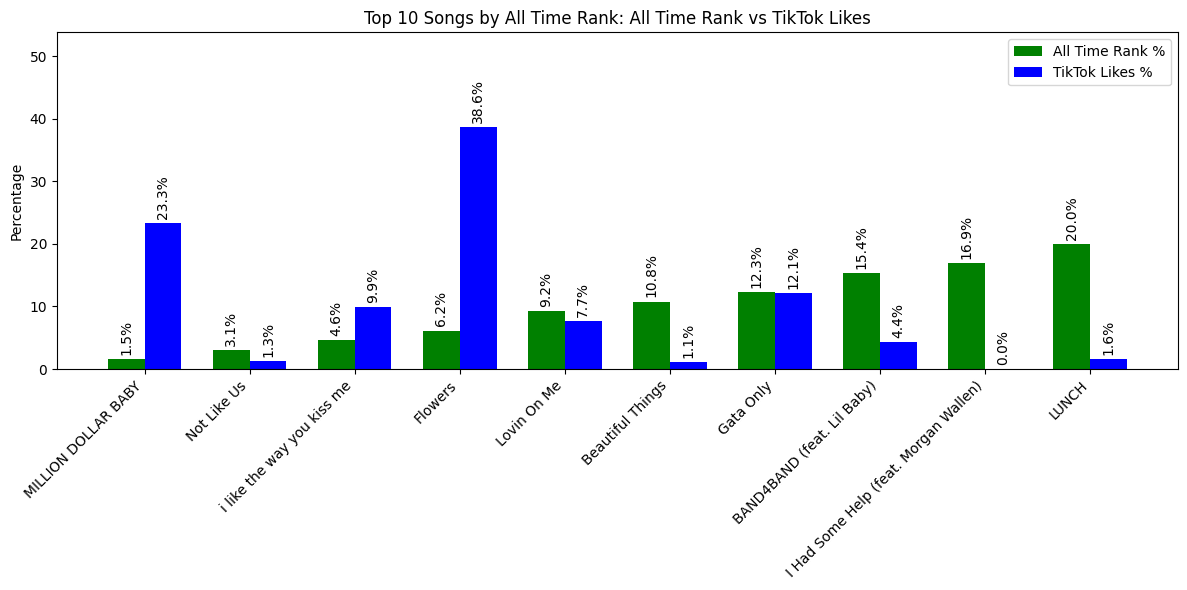


Best (Lowest) All Time Rank: 1
Worst (Highest) All Time Rank in Top 10: 13
Average All Time Rank for Top 10: 6
Total TikTok Likes for Top 10: 2,791,424,749
Correlation between All Time Rank and TikTok Likes for Top 10: -0.5014

Top 10 Songs by All Time Rank:
                                Track         Artist All Time Rank  TikTok Likes
                  MILLION DOLLAR BABY  Tommy Richman             1   651,565,900
                          Not Like Us Kendrick Lamar             2    35,223,547
           i like the way you kiss me        Artemas             3   275,154,237
                              Flowers    Miley Cyrus             4 1,078,757,968
                          Lovin On Me    Jack Harlow             6   214,943,489
                     Beautiful Things   Benson Boone             7    29,584,940
                            Gata Only     FloyyMenor             8   338,546,668
           BAND4BAND (feat. Lil Baby)    Central Cee            10   121,574,500
I Had Some 

In [37]:
# Sort DataFrame by All Time Rank in ascending order (best ranks first) and get top 10
top_ten_rank_df = spotify_likes_data_clean.sort_values(by='All Time Rank', ascending=True).head(10)

# Calculate percentages
total_tiktok_likes = top_ten_rank_df['TikTok Likes'].sum()
total_all_time_rank = top_ten_rank_df['All Time Rank'].sum()

top_ten_rank_df['TikTok Percentage'] = (top_ten_rank_df['TikTok Likes'] / total_tiktok_likes) * 100
top_ten_rank_df['Rank Percentage'] = (top_ten_rank_df['All Time Rank'] / total_all_time_rank) * 100

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(top_ten_rank_df))
width = 0.35

rects1 = ax.bar(x - width/2, top_ten_rank_df['Rank Percentage'], width, label='All Time Rank %', color='green')
rects2 = ax.bar(x + width/2, top_ten_rank_df['TikTok Percentage'], width, label='TikTok Likes %', color='blue')

# Customize the chart
ax.set_ylabel('Percentage')
ax.set_title('Top 10 Songs by All Time Rank: All Time Rank vs TikTok Likes')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_rank_df['Track'], rotation=45, ha='right')
ax.legend()

# Set y-axis limit to give more room at the top
y_max = max(top_ten_tiktok_df['TikTok Percentage'].max(), top_ten_tiktok_df['Rank Percentage'].max())
ax.set_ylim(0, y_max * 1.5)  # Add 15% more space at the top

# Add value labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=90)

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Print some additional statistics
print(f"\nBest (Lowest) All Time Rank: {int(top_ten_rank_df['All Time Rank'].min())}")
print(f"Worst (Highest) All Time Rank in Top 10: {int(top_ten_rank_df['All Time Rank'].max())}")
print(f"Average All Time Rank for Top 10: {int(top_ten_rank_df['All Time Rank'].mean())}")
print(f"Total TikTok Likes for Top 10: {int(total_tiktok_likes):,}")
print(f"Correlation between All Time Rank and TikTok Likes for Top 10: {top_ten_rank_df['All Time Rank'].corr(top_ten_rank_df['TikTok Likes']):.4f}")

# Display the data for the top 10 songs
print("\nTop 10 Songs by All Time Rank:")
print(top_ten_rank_df[['Track', 'Artist', 'All Time Rank', 'TikTok Likes']].to_string(index=False, 
    formatters={
        'All Time Rank': lambda x: f'{int(x)}',
        'TikTok Likes': lambda x: f'{int(x):,}'
    }))